In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 13.5

base_acc_time = [304, 0.663]
ds_acc_time = [390, 0.6533]

In [2]:
cifar_base_df = pd.read_csv("cifar_base.txt", sep="\t", header=None)
base_acc_arr = np.array(cifar_base_df.iloc[:, 0])
base_time_arr = np.array(cifar_base_df.iloc[:, 1])

cifar_ds_df = pd.read_csv("cifar_ds.txt", sep="\t", header=None)
ds_acc_arr = np.array(cifar_ds_df.iloc[:, 0])
ds_time_arr = np.array(cifar_ds_df.iloc[:, 1])

In [3]:
cifar_acc_df = pd.read_csv("cifar_flower_acc.txt").iloc[:, 1]

cifar_acc_arr = []
for i in range(len(cifar_acc_df)):
    cur_val = float(cifar_acc_df[i][10:])
    cifar_acc_arr.append(cur_val)

In [4]:
cifar_time_df = pd.read_csv("cifar_flower_time.txt").iloc[:, 0]

cifar_time_arr = []
for i in range(len(cifar_time_df)):
    cur_val = float(cifar_time_df[i][5:])
    cifar_time_arr.append(cur_val)

for i in range(1, len(cifar_time_arr)):
    cifar_time_arr[i] = cifar_time_arr[i] - cifar_time_arr[0]

In [5]:
openfl_df = pd.read_csv("cifar_openfl.txt", header=None, sep="\t")
openfl_time_arr = np.array(openfl_df.iloc[:,0])
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

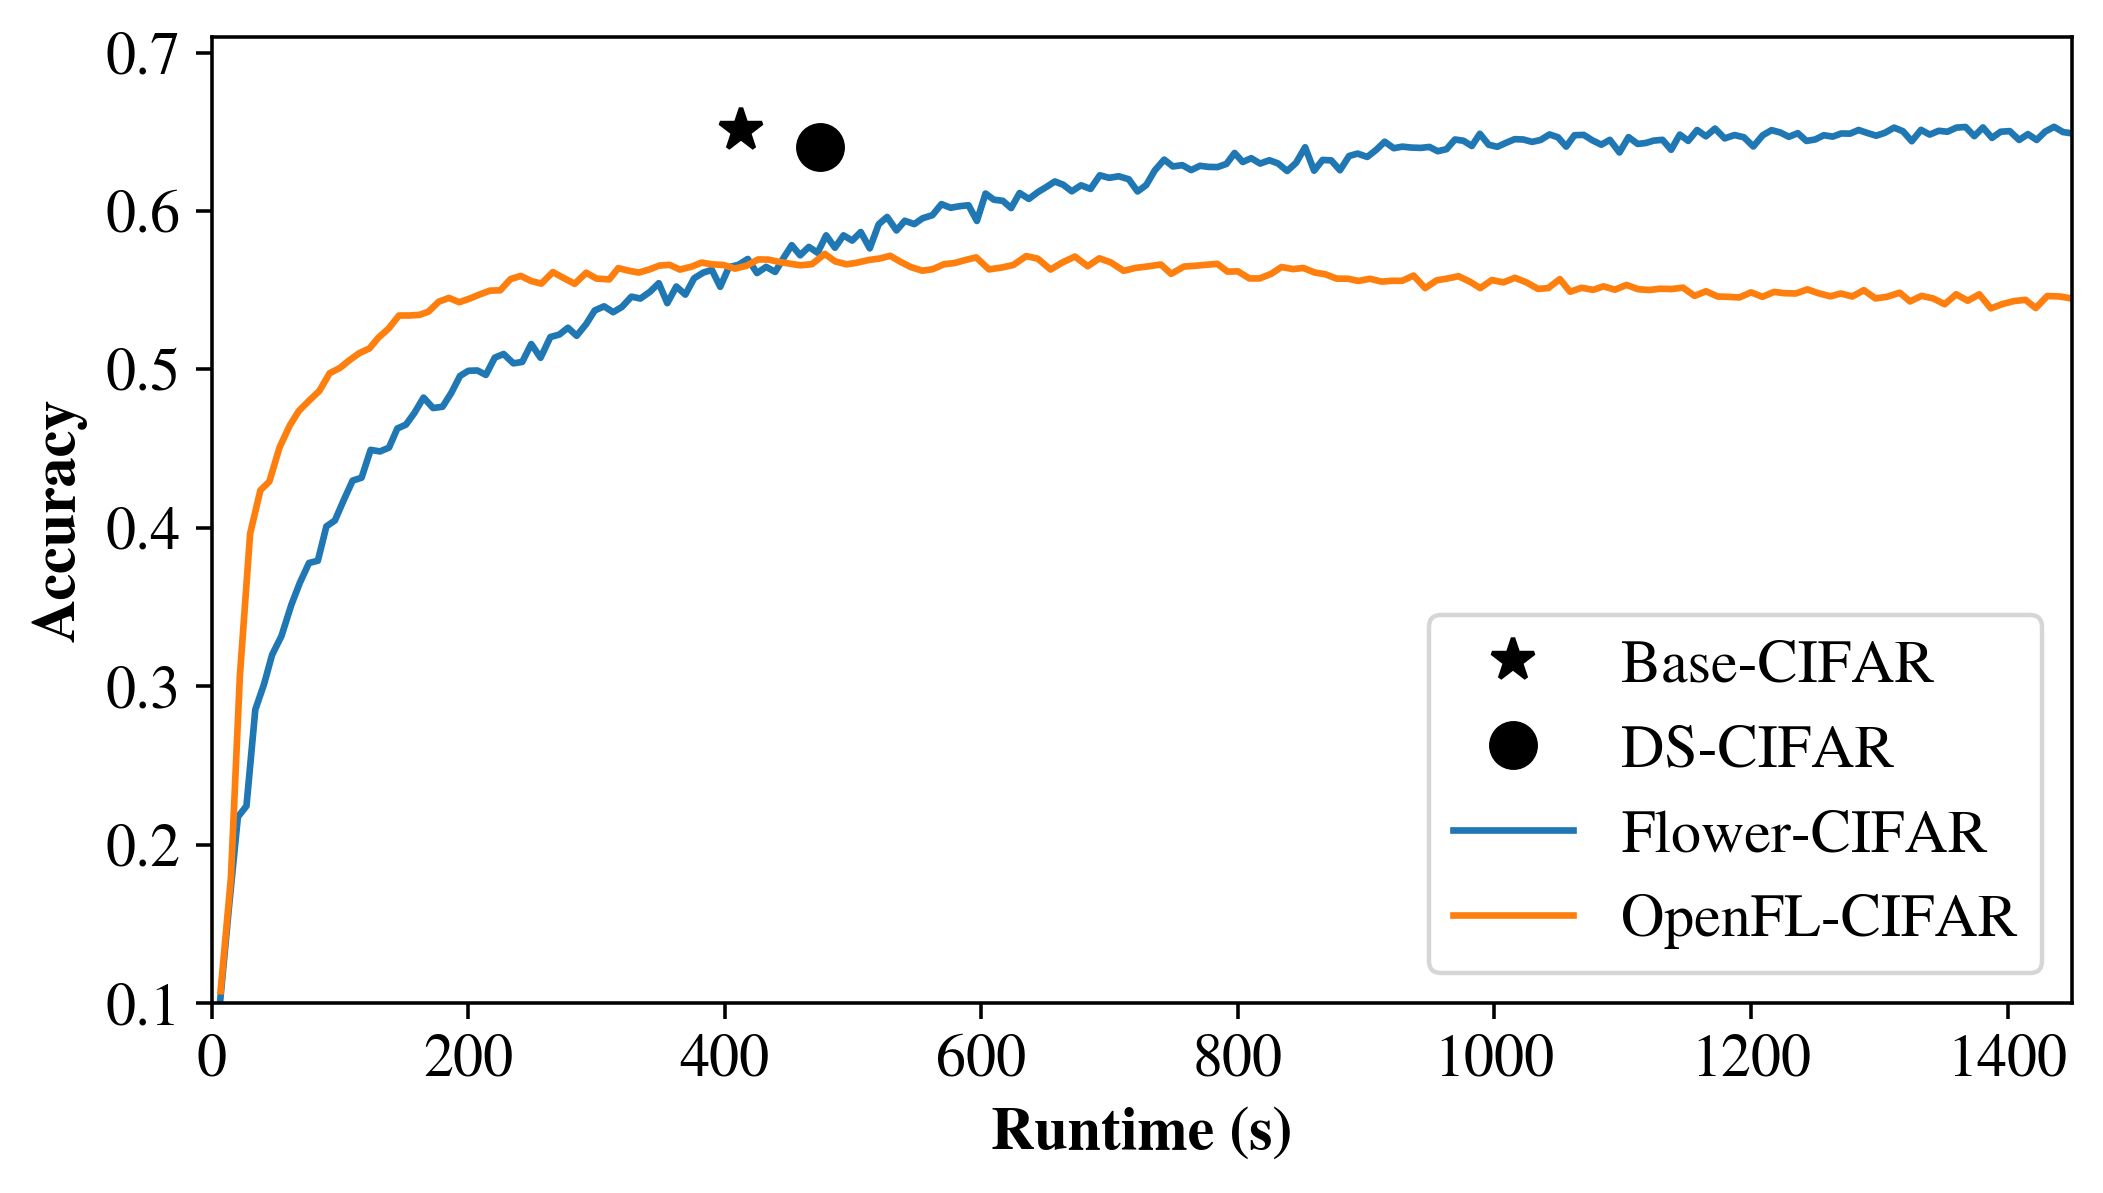

In [19]:
fig = plt.figure(figsize=(7.5, 4), dpi=320)
ax = plt.axes()
# ax.set_facecolor([255/255, 235/255, 61/255])

plt.plot(base_time_arr[28],
         base_acc_arr[28],
         marker='*',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-CIFAR")
plt.plot(ds_time_arr[27],
         ds_acc_arr[27],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-CIFAR")
plt.plot(cifar_time_arr[1:], cifar_acc_arr[1:], label="Flower-CIFAR")
plt.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-CIFAR")
plt.xlabel("Runtime (s)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
# ax.set_xticks([])
# ax.set_yticks([])
plt.legend()
plt.ylim([0.1, 0.71])
plt.xlim([0, 1450])
plt.savefig("cifar_8.pdf",
            # facecolor=[255/255, 235/255, 61/255],
            bbox_inches='tight',)